# Exercise for Lecture 14: Building Models
  
Having learned the basics of regression and classification, we will now use neural network to carry out these two tasks.

This notebook is not a tutorial, and will therefore only give you hints at how to solve the exercises. The results of this notebook will be part of your hand-in for this part of the course.

<font color='green'>
My paragraphs are shown in green, and my comments are indicated by ### instead of just one. Sometimes I will display things such as lists and dicts as pd.Series() or pd.DataFrame(), this is just to trigger Jupyter's nicer visualization.
Don't really care much for the custom CSS, so I disabled that cell.
</font> 

In [1]:
#from IPython.core.display import HTML
#css_file = './31380.css'
#HTML(open(css_file, "r").read())

## Exercise 1: Regression

Import the combined gaia file from last exercise and split it into training set and test set. Use 3/4 of the data for training.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
%matplotlib inline

<font color='green'>
First I create a Series to contain my dataframes.
</font> 

In [3]:
# Import the gaia data here
data = pd.Series({})
data['raw'] = pd.read_csv("data/gaia.csv")
data['raw'].columns.values

array(['TIMESTAMP', 'WINDSPEED[m/s]', 'Unnamed: 2', 'RPM0[1/min]',
       'Unnamed: 4', 'RPM1[1/min]', 'Unnamed: 6', 'P[kW]', 'Unnamed: 8',
       'U[V]', 'Unnamed: 10', 'STATE[-]', 'Unnamed: 12'], dtype=object)

Plot the scatter plot of windspeed vs. power output. Remember that this is the underlying function we want to approximate.

<font color='green'>
I wanna work with cleaned data, so before plotting I just clean up the raw data by dropping NA.
</font> 


In [4]:
data['clean'] = data['raw'].dropna()

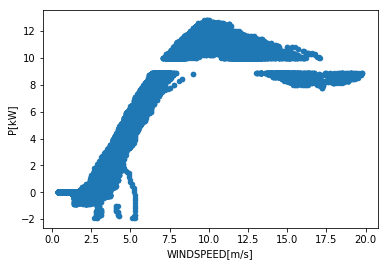

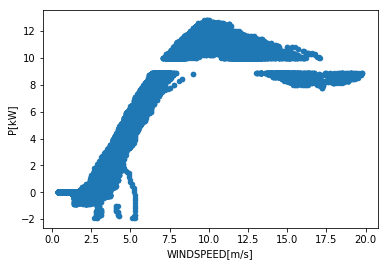

In [5]:
# Your scatter plot looks nice here
data['raw'].plot.scatter(x='WINDSPEED[m/s]', y='P[kW]');
data['clean'].plot.scatter(x='WINDSPEED[m/s]', y='P[kW]');

<font color='green'>
I can see that the two scatter plots look quite similar, but I will continue to work on the 'clean' data. Before proceeding, it might be interesting to look for other correlations in this dataset. We can visualize this using a heatmat, which basically just colors a correlation matrix. I want to look for decent correlations, so I set my highlighting threshold to 0.7
</font> 

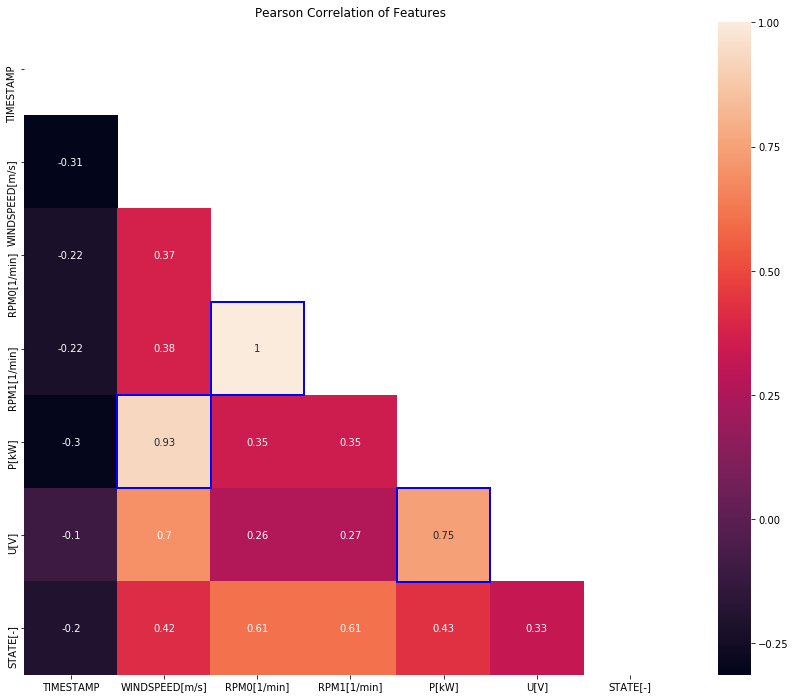

In [6]:
data['numerical_correlation'] = data['clean'].corr()
plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation of Features')

# Mask to remove diagonal and upper half
mask = np.zeros_like(data['numerical_correlation'], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data['numerical_correlation'],vmax=1,square=True,annot=True,mask=mask);


for cell in ax.texts:
    if (abs(float(cell.get_text())) > 0.7):
        ax.add_patch(Rectangle((int(cell.get_position()[0]-0.5), int(cell.get_position()[1]-0.5)), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

<font color='green'>
From the correlation matrix we can see that Windspeed and P correlate well. However, when we look at the scatterplot we can clearly see that the poweroutput follows the wind speed up to around 10, after which is starts falling again. This tells us that even though windspeed and power are highly correlated, any model we build based on a linear relationship will make incorrect predictions after wind speeds of 10. This implies that we should use a different approach.
</font> 

Try your hand at generating your first neural network. You can use the example from the lecture to get started. Choose different activation functions, learning rates, epochs and batch sizes. What can you say about the relationship between these values and their influence on the RMSE of your model prediction. Refer to the [Keras documentation](https://keras.io) in order to get an idea of the capabilities of the library.

<font color='green'>
Before I start training my neural network, I need to split my dataset into a test and training set. I use 3/4 of my data as training data.
</font>

In [7]:
### Hi there! This is for some stuff related to running everything on a GPU, feel free to ignore for now
'''
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

### Adapted code for GPU
from keras import backend as K

with K.tf.device('/gpu:1'):
    from keras.models import Sequential
    from keras.layers import Dense, Activation
    from keras import optimizers
    K.set_session(K.tf.Session(config=K.tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)))
    model = Sequential()
    model.add(Dense(10, input_shape=(1,)))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('linear'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='mean_squared_error', optimizer=adam)
    model.fit(X_train.values,y_train.values, epochs = 80, batch_size=500, shuffle=False)
    y_pred = model.predict(X_test.values, batch_size = 1000)

''';


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['clean']['WINDSPEED[m/s]'], data['clean']['P[kW]'], test_size=0.25, random_state=42)
n_total = data['clean'].shape[0]
n_train = len(x_train)
n_test = len(x_test)

<font color='green'>
After the split, we can run the model from the slides
</font>

In [9]:
# Code from slide
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model = Sequential()
model.add(Dense(10, input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(x_train.values, y_train.values, epochs = 80, batch_size=500, shuffle=False)
y_pred = model.predict(x_test.values, batch_size = 1000)

Using TensorFlow backend.


Epoch 1/80
299639/299639 [==============================] - 0s - loss: 10.5750     
Epoch 2/80
299639/299639 [==============================] - 0s - loss: 2.9199     
Epoch 3/80
299639/299639 [==============================] - 0s - loss: 2.4530     
Epoch 4/80
299639/299639 [==============================] - 0s - loss: 2.1755     
Epoch 5/80
299639/299639 [==============================] - 0s - loss: 2.0769     
Epoch 6/80
299639/299639 [==============================] - 0s - loss: 2.0595     
Epoch 7/80
299639/299639 [==============================] - 0s - loss: 2.0583     
Epoch 8/80
299639/299639 [==============================] - 0s - loss: 2.0582     
Epoch 9/80
299639/299639 [==============================] - 0s - loss: 2.0582     
Epoch 10/80
299639/299639 [==============================] - 0s - loss: 2.0581     
Epoch 11/80
299639/299639 [==============================] - 0s - loss: 2.0580     
Epoch 12/80
299639/299639 [==============================] - 0s - loss: 2.0579     


Try plotting the time series of your prediction and your y_test. Does it look as expected? How about a scatter plot of the windspeed vs. your prediction?

<font color='green'>
Before plotting I arrange my prediction data in a new dataframe called pdata(prediction data) - consider moving to main data somewhere...
</font>

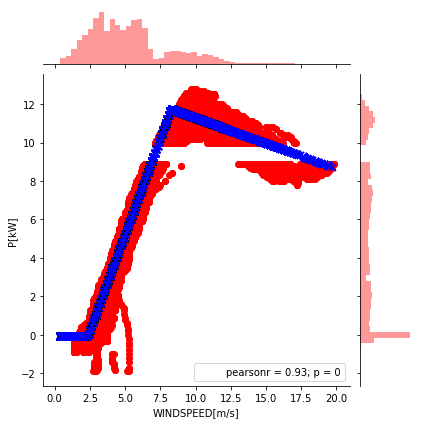

In [10]:
pdata = pd.DataFrame({'x_test.values' : x_test.values, 'y_pred' : y_pred.flatten()})
# Your pretty plots here
graph = sns.jointplot(x=data['clean']['WINDSPEED[m/s]'], y=data['clean']['P[kW]'], color='r')
graph.x = pdata['x_test.values']
graph.y = pdata['y_pred']
graph.plot_joint(plt.scatter, marker='x', c='b', s=50);

<font color='green'>
Looking at the predictions(blue) we can conclude that the prediction follows the general tendency of the data. Finally we can visualize our neural network layers.
</font>

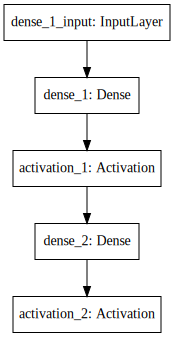

In [11]:
### To get visualization to work
### http://www.graphviz.org/Download_windows.php
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### from keras.utils import plot_model
### plot_model(model, to_file='model.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

If you want to try something with more dimensions, play with the solar data, or find a fun data set [here](https://archive.ics.uci.edu/ml/datasets.html)

## Exercise 2: Classification

In this exercise we will use the following set of data: https://archive.ics.uci.edu/ml/machine-learning-databases/00194/

Download the AllData.zip, unpack it and read the file Wall-following.names

Import the sensor_readings_XX.data files, and visualize the data with 2 sensor readings in a scatter plot.

* *Hint: Use the code snippet provided below*

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Import the files by using pandas here, notice that there's no header,
# so you will have to set the option header=None when importing
data = pd.Series({})
base_names = ['a','b','c']
data['s2'] = pd.read_csv('data/sensor_readings_2.data', names=base_names)
data['s4'] = pd.read_csv('data/sensor_readings_4.data', names=base_names)
data['s24'] = pd.read_csv('data/sensor_readings_24.data', names=base_names)
data['s2'].head(3)
print(data['s2'].shape)

(5456, 3)


<font color='green'>
Note that I gave the columns headers called 'a', 'b' and 'c'. The names do not refer to anything, I just find it easier that way.

Since we have classified data we first convert this data into a one hot notation. We also create a dictionary to keep track of the mappings.
</font>

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

def toonehot(entry):
    encoder = LabelEncoder()
    encoder.fit(entry)
    all_Y = pd.DataFrame(np_utils.to_categorical(encoder.transform(entry)), columns=encoder.classes_).astype(int)
    
    return all_Y, encoder.classes_.tolist()

one_hot_y, mapping = toonehot(data['s2']['c'])
data['s2'] = pd.concat([data['s2'], one_hot_y], axis=1, ignore_index=True)
classes_t = [name+"_t" for name in mapping]
data['s2'].columns = base_names + classes_t
data['s2'].head()

,a,b,c,Move-Forward_t,Sharp-Right-Turn_t,Slight-Left-Turn_t,Slight-Right-Turn_t
0,1.687,0.445,Slight-Right-Turn,0,0,0,1
1,1.687,0.449,Slight-Right-Turn,0,0,0,1
2,1.687,0.449,Slight-Right-Turn,0,0,0,1
3,1.687,0.449,Slight-Right-Turn,0,0,0,1
4,1.687,0.449,Slight-Right-Turn,0,0,0,1


<font color='green'>
Now we can contain the one-hot version of our class data in the same dataframe, we name the columns based on the mapping from the encoder.
</font>

<font color='green'>
Let's plot the original data
</font>

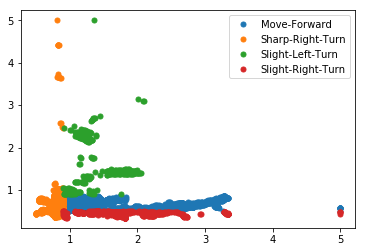

In [15]:
# Visualize here
data_2_sensors = data['s2'].groupby('c')

fig, ax = plt.subplots()
ax.margins(0.05) # A adds 5% padding to the autoscaling
for movement, sensor in data_2_sensors:
    ax.plot(sensor['a'], sensor['b'], marker='o', linestyle='', ms=5, label=movement)
ax.legend()

plt.show()

As in the previous exercise, create, train and tune a neural network classifier that allows the robot to decide which action it should take. Remember to split training set and test set. In the case of a classifier you must choose a different loss function. A popular one for classification is the categorical_crossentropy.

<font color='green'>
First we split the dataset into a training and testing dataset. We use the 'a' and 'b' columns as our independant variables, and the "mapping" columns for our values. For the mappings, we will use the classes_t from earlier, since these values represent the true values.
</font>

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['s2'][['a','b']], data['s2'][classes_t], test_size=0.33, random_state=42)

<font color='green'>
We can now create a train out models. Based on the data we know that the model should have: 2 inputs -> [4 hidden nodes] -> 4 outputs:

inputs: 'a' and 'b' column from original dataset.<br>
hidden nodes:<br>
outputs: 'Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn', 'Slight-Right-Turn'<br>

</font>

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

def baseline_model():
    '''
    Loss functions:
        'mean_squared_error'
        'categorical_crossentropy'
    '''
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation='relu') )
    model.add(Dense(4, activation='softmax'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam)
    model.fit(x_train.values, y_train.values, epochs = 80, batch_size=500, shuffle=False)
    y_pred = model.predict(x_test.values, batch_size = 1000)
    
    return y_pred

y_pred = baseline_model()

Epoch 1/80
3655/3655 [==============================] - 0s - loss: 1.8293     
Epoch 2/80
3655/3655 [==============================] - 0s - loss: 1.7837     
Epoch 3/80
3655/3655 [==============================] - 0s - loss: 1.7403     
Epoch 4/80
3655/3655 [==============================] - 0s - loss: 1.6996     
Epoch 5/80
3655/3655 [==============================] - 0s - loss: 1.6616     
Epoch 6/80
3655/3655 [==============================] - 0s - loss: 1.6267     
Epoch 7/80
3655/3655 [==============================] - 0s - loss: 1.5947     
Epoch 8/80
3655/3655 [==============================] - 0s - loss: 1.5655     
Epoch 9/80
3655/3655 [==============================] - 0s - loss: 1.5391     
Epoch 10/80
3655/3655 [==============================] - 0s - loss: 1.5152     
Epoch 11/80
3655/3655 [==============================] - 0s - loss: 1.4934     
Epoch 12/80
3655/3655 [==============================] - 0s - loss: 1.4732     
Epoch 13/80
3655/3655 [==========================

<font color='green'>
Now that we have created a model and made predictions, we will combine all the data in our main dataframe.
</font>

In [18]:
y_pred = y_pred.astype('float64')
y_pred = pd.DataFrame(y_pred)
x_true = pd.DataFrame(data['s2'][['a','b']]) # X values for test
y_true = pd.DataFrame(data['s2'][classes_t]) # One hot classification: Dataset

zero = pd.DataFrame(np.zeros((len(x_train), 4)))
result = pd.concat([zero, y_pred])
result.reset_index(inplace=True, drop=True)
classes_p = [name+"_p" for name in mapping]
result.columns = classes_p

data['s2'] = data['s2'].join(result)
data['s2'].tail()

,a,b,c,Move-Forward_t,Sharp-Right-Turn_t,Slight-Left-Turn_t,Slight-Right-Turn_t,Move-Forward_p,Sharp-Right-Turn_p,Slight-Left-Turn_p,Slight-Right-Turn_p
5451,1.024,0.657,Move-Forward,1,0,0,0,0.331627,0.324220,0.140635,0.203518
5452,0.894,0.649,Sharp-Right-Turn,0,1,0,0,0.341961,0.395865,0.172197,0.089976
5453,0.873,0.642,Sharp-Right-Turn,0,1,0,0,0.326489,0.315195,0.137633,0.220683
5454,0.967,0.635,Move-Forward,1,0,0,0,0.344753,0.388644,0.167454,0.099149
5455,0.854,0.628,Sharp-Right-Turn,0,1,0,0,0.138078,0.525125,0.336242,0.000555


<font color='green'>
We now have all data we can finally evaluate our model.
</font>

count    1801.000000
mean        0.513583
std         0.146415
min         0.290579
25%         0.448100
50%         0.462165
75%         0.489088
max         1.866812
dtype: float64

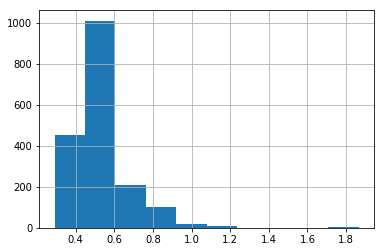

In [19]:
from keras.losses import binary_crossentropy
from keras import backend as K

n_test = len(x_test)

error_y_true = K.variable( y_true.tail(n_test).values )
error_y_pred = K.variable( y_pred.tail(n_test).values )
error = K.eval(binary_crossentropy(error_y_true, error_y_pred))

pd.Series(error).hist();
pd.Series(error).describe()

In [20]:
### Calculate model score - unused for now
'''
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier


encoder = LabelEncoder()
encoder.fit(data['s2']['c'])
encoded_Y = encoder.transform(data['s2']['c'])

seed = 7
np.random.seed(seed)
#kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
results = cross_val_score(estimator, x_true.values, encoded_Y, cv=kfold)

#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
''';

## Unrelated Keras

In [22]:
### https://chrisalbon.com/deep-learning-keras/k-fold_cross-validating_neural_networks.html
'''
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 4,
                                       weights = [.5, .5],
                                       random_state = 0)

# Create function returning a compiled network
def create_network():

    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
''';

## Reusing models

In [30]:
from keras.models import load_model
model.save('ex14_2.h5')  # creates a HDF5 file 'my_model.h5'

In [35]:
model = load_model('ex14_2.h5')
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(x_train.values, y_train.values, epochs = 80, batch_size=500, shuffle=False)

#y_pred = model.predict(x_test.values, batch_size = 1000)

Epoch 1/80
3655/3655 [==============================] - 0s - loss: 0.8755 - acc: 0.6793     
Epoch 2/80
3655/3655 [==============================] - 0s - loss: 0.8676 - acc: 0.6826     
Epoch 3/80
3655/3655 [==============================] - 0s - loss: 0.8597 - acc: 0.6848     
Epoch 4/80
3655/3655 [==============================] - 0s - loss: 0.8527 - acc: 0.6873     
Epoch 5/80
3655/3655 [==============================] - 0s - loss: 0.8467 - acc: 0.6884     
Epoch 6/80
3655/3655 [==============================] - 0s - loss: 0.8415 - acc: 0.6903     
Epoch 7/80
3655/3655 [==============================] - 0s - loss: 0.8369 - acc: 0.6936     
Epoch 8/80
3655/3655 [==============================] - 0s - loss: 0.8328 - acc: 0.6947     
Epoch 9/80
3655/3655 [==============================] - 0s - loss: 0.8291 - acc: 0.6960     
Epoch 10/80
3655/3655 [==============================] - 0s - loss: 0.8258 - acc: 0.6966     
Epoch 11/80
3655/3655 [==============================] - 0s - loss: 0

In [38]:
score = model.evaluate(x_test.values, y_test.values, batch_size=8)

1488/1801 [=======================>......] - ETA: 0s

In [39]:
score

[0.73849751378747241, 0.68906163242642982]